In [46]:
#!/usr/bin/env python

#######
#
# BMI 2005 - BioAlgorithms
# Assignment 1
# Due: 01/30/19
#
# By: Ryan Neff
# ryan.neff@icahn.mssm.edu
#
#######

#Question 1
'''
Lennard Jones potential (LJ) function: 

V_lj = 4*epsilon*((sigma/distance)^12 - (sigma/distance)^6)

where: 
    episilon, e: depth of potential well (strength of non-bonded attraction between two atoms)
    sigma, s: distance at which inter-particle potential is 0
    distance, r: distance between particles
'''
##### Question 1a #####
def naive_lennard_jones(r,s=1,e=1):
    '''naive_lennard_jones(r)
     Computes the potential energy V_ij between two atoms i and j
     with distance r where e and s are set to 1

     Inputs: 
        r (float)
            Distance between two atoms i and j
    
    Outputs:
        V_ij (float)
            Potential energy between two atoms
    '''
    return 4*s*e*(s**12/r**12 - s**6/r**6)

###### Question 1b #####
'''efficient algorithm equation:
        V_ij = -4*e*u(1-u)
    substitute z**3 for u:
        V_ij = -4*e*z^3(1-z^3)
    substitute s^2/r^2 for z:
        V_ij = -4*e*(s^2/r^2)^3(1-(s^2/r^2)^3)
    distribute powers:
        V_ij = -4*e*(s^6/r^6)(1-(s^6/r^6))
    move s^6/r^6 to inside parenthesis:
        V_ij = -4*e*((s^6/r^6)*1 - (s^6/r^6)*(s^6/r^6))
    distribute powers: 
        V_ij = -4*e*((s^6/r^6) - (s^12/r^12))
    move -1 to inside parenthesis:
        V_ij = 4*e*(-(s^6/r^6) + (s^12/r^12))
        V_ij = 4*e*((s^12/r^12)-(s^6/r^6))
    Let x^z/y^z = (x/y)^z.
        therefore:
            V_ij = 4*e*((s/r)^12-(s/r)^6)
    ***This is the original equation. QED***
'''

##### Question 1c #####
def efficient_lennard_jones(r,s,e):
    '''efficient_lennard_jones(r,s,e)
     Computes the potential energy V_ij between two atoms i and j

     Inputs: 
        r (float)
            Distance between two atoms i and j
        s (float)
            Sigma, distance at which inter-particle potential is 0
        e (float)
            Epsilon, strength of non-bonded attraction between two atoms
    
    Outputs:
        V_ij (float)
            Potential energy between two atoms
    '''

    r2 = r**2
    s2 = s**2
    z = s2/r2
    u = z**3
    return -4*e*u*(1-u)

'''
## Performance Analysis ##
naive:
    code:
        return 4*s*e*(s**12/r**12 - s**6/r**6)

    First step: r**12
    Second step: s**12
    Third step: s**12/r**12
    Fourth step: r**6
    Fifth step: s**6
    Sixth step: s**6/r**6
    Seventh step: s**12/r**12-s**6/r**6
    Eighth step: 4*s
    Ninth step: 4*s*e
    Tenth step: 4*s*e*(s**12/r**12-s**6/r**6)

    Total steps: 10
    Performance: O(1) - constant time for constant input

efficient:
    code: 
        r2 = r**2
        s2 = s**2
        z = s2/r2
        u = z**3
        return -4*e*u*(1-u)

    First step: r2 = r**2
    Second step: s2 = s**2
    Third step: z = s2/r2
    Fourth step: u = z**3
    Fifth step: 1-u
    Sixth step: -4*e
    Seventh step: (-4*e)*u
    Eighth step: ((-4*e)*u)*(1-u)

    Total steps: 8
    Performance: O(1) - constant time for constant input

## Conclusion ##
The efficient algorithm should be around 20% faster than the naive implementation, 
but both of them run in constant time.
'''

##### Question 1d #####
import cProfile
cProfile.run('for i in range(0,1000000): naive_lennard_jones(2.5)') #naive
cProfile.run('for i in range(0,1000000): efficient_lennard_jones(2.5,1,1)') #efficient

'''
## Performance Results ##
Naive implementation:
1000003 function calls in 1.013 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.193    0.193    1.013    1.013 <string>:1(<module>)
  1000000    0.820    0.000    0.820    0.000 Homework1.py:25(naive_lennard_jones)
        1    0.000    0.000    1.013    1.013 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


Efficient implementation: 
    1000003 function calls in 0.768 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.202    0.202    0.768    0.768 <string>:1(<module>)
  1000000    0.566    0.000    0.566    0.000 Homework1.py:72(efficient_lennard_jones)
        1    0.000    0.000    0.768    0.768 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

## Conclusion ##
The efficient implementation is more efficient timewise. The efficient 
implementation has fewer operations because it only calculates the common factors for the 
fractions inside the parentheses (saving some work). This is reflected in the cProfile 
timings for 1M loop iterations. 
'''

##### Question 2 #####
''' file format:
<number of atoms / lines>
<comment>
<atom type> <x> <y> <z>
'''




         1000003 function calls in 1.087 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1000000    0.868    0.000    0.868    0.000 <ipython-input-46-09111ef918c8>:26(naive_lennard_jones)
        1    0.219    0.219    1.087    1.087 <string>:1(<module>)
        1    0.000    0.000    1.087    1.087 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         1000003 function calls in 0.813 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1000000    0.599    0.000    0.599    0.000 <ipython-input-46-09111ef918c8>:64(efficient_lennard_jones)
        1    0.214    0.214    0.813    0.813 <string>:1(<module>)
        1    0.000    0.000    0.813    0.813 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




' file format:\n<number of atoms / lines>\n<comment>\n<atom type> <x> <y> <z>\n'

In [20]:
import numpy as np
import re

def read_xyz(input_filename):
    number_of_atoms, comment, output = None, None, []
    with open(input_filename,"r") as fp:
        for line in fp:
            line = line.strip() #clean input
            if number_of_atoms == None:
                number_of_atoms = int(line)
            elif comment == None:
                comment = line
            else:
                splitline = [float(a) for a in re.split(" +",line)[1:]]
                output.append(splitline)
    output = np.array(output,dtype="float32")
    return output

read_xyz("lj-0200.xyz")

array([[ -3.65741998e-01,  -1.43423605e+00,   1.08671296e+00],
       [  1.75808501e+00,  -2.73350501e+00,  -4.55397010e-01],
       [ -2.77726007e+00,   8.65972996e-01,  -9.78808999e-01],
       [ -8.50929022e-01,   8.05368006e-01,  -1.05060697e+00],
       [  4.69727993e-01,  -1.26245499e+00,   1.77013397e+00],
       [  1.77695405e+00,   2.28491902e+00,   2.69121695e+00],
       [  1.56436896e+00,   2.10038710e+00,  -3.89806002e-01],
       [  2.15364599e+00,   1.23354602e+00,   1.14566100e+00],
       [  2.37399411e+00,   2.37250996e+00,   1.52220404e+00],
       [ -3.88301998e-01,  -2.29545212e+00,  -2.28027391e+00],
       [  3.07527006e-01,  -2.48276091e+00,   3.00956511e+00],
       [ -2.30022597e+00,   1.95374995e-01,  -2.84524012e+00],
       [  1.43750995e-01,   2.30260801e+00,  -1.03665197e+00],
       [ -8.15065026e-01,   2.28512692e+00,   2.22830892e+00],
       [ -5.32504976e-01,  -2.07796597e+00,  -2.12623000e-01],
       [ -2.50516105e+00,  -2.03212190e+00,   3.9561700

In [21]:
##### Question 2b #####
with open("lj-0003.xyz","w") as fp:
    fp.write('''3
Cambridge Cluster Database
LJ 0.5391356726 0.1106588251 -0.4635601962
LJ -0.5185079933 0.4850176090 0.0537084789
LJ 0.0793723207 -0.4956764341 0.5098517173''')

test_3 = read_xyz("lj-0003.xyz")
test_200 = read_xyz("lj-0200.xyz")
test_500 = read_xyz("lj-0500.xyz")
test_1000 = read_xyz("lj-1000.xyz")

In [27]:
##### Question 3a #####
def number_of_pairwise_interactions(n):
    return int((n**2-n)/2)

print("For 3 atoms:", number_of_pairwise_interactions(3))
print("For 200 atoms:", number_of_pairwise_interactions(200))
print("For 500 atoms:", number_of_pairwise_interactions(500))
print("For 1000 atoms:", number_of_pairwise_interactions(1000))

For 3 atoms: 3
For 200 atoms: 19900
For 500 atoms: 124750
For 1000 atoms: 499500


In [28]:
def calculate_pairwise_distance(i,j):
    '''calculate_pairwise_distance(i,j)
    Calculates distance between two sets of 3D coordinates. 

    Inputs:
        i - list-like with 3 elements, all floats
            x,y,z position for set 1
        j - list-like with 3 elements, all floats
            x,y,z position for set 2
    
    Returns:
        distance
            distance between i and j
    '''

    return np.sqrt( (j[0]-i[0])**2 + (j[1]-i[1])**2 + (j[2]-i[2])**2 )

In [43]:
len(test_200)

200

In [70]:
def calculate_system_energy(input_array):
    '''calculate_system_energy(input_array)
    Calculates the total potential energy of the system based on atom 3D coordinates,
    using the LJ equation. 

    Inputs:
        input_array
            A numpy.array() of dtype float32, (n rows by 3 columns), 
            representing 3D coordiantes of atoms. 

    Returns:
        total_energy (float)
            The total energy of the system
    '''
    total_energy = 0
    num_rows = len(input_array)
    for row1_ix in range(0,num_rows):
        row1 = input_array[row1_ix,:]
        for row2_ix in range(row1_ix+1,num_rows):
            total_energy += efficient_lennard_jones(calculate_pairwise_distance(row1,input_array[row2_ix,:]),1,1)
    return total_energy

In [72]:
print(calculate_system_energy(test_3))
print(calculate_system_energy(test_200))
print(calculate_system_energy(test_500))
print(calculate_system_energy(test_1000))

-2.42451546927
-799.624784069
-3315.98663275
-7017.92348826


In [74]:
def calculate_system_energy_naive_cutoff(input_array, cutoff_dist=1):
    '''calculate_system_energy_naive_cutoff(input_array)
    Calculates the total potential energy of the system based on atom 3D coordinates,
    using the LJ equation (efficient algorithm). 

    Inputs:
        input_array
            A numpy.array() of dtype float32, (n rows by 3 columns), 
            representing 3D coordiantes of atoms.
        cutoff_dist
            Distance within we will consider pairwise interactions. Beyond this, 
            the energy will not be calculated. 

    Returns:
        total_energy (float)
            The total energy of the system.
    '''
    total_energy = 0
    num_rows = len(input_array)
    for row1_ix in range(0,num_rows):
        row1 = input_array[row1_ix,:]
        for row2_ix in range(row1_ix+1,num_rows):
            r = calculate_pairwise_distance(row1,input_array[row2_ix,:])
            if r <= cutoff_dist:
                total_energy += efficient_lennard_jones(r,1,1)
    return total_energy

print(calculate_system_energy_naive_cutoff(test_3)) ## -2.42451546927
print(calculate_system_energy_naive_cutoff(test_200)) ## -799.624784069
print(calculate_system_energy_naive_cutoff(test_500)) ## -3315.98663275
print(calculate_system_energy_naive_cutoff(test_1000)) ## -7017.92348826

0
37.8305661135
30.5643572661
58.5072399514


In [99]:
cutoff_results = []

for cutoff in range(5,50):
    cutoff = cutoff/10
    res = (cutoff,calculate_system_energy_naive_cutoff(test_1000,cutoff))
    print(res)
    cutoff_results.append(res)

cutoff_results = np.array(cutoff_results)

(0.5, 0)
(0.6, 0)
(0.7, 0)
(0.8, 0)
(0.9, 0)
(1.0, 58.50723995135499)
(1.1, -2306.512680215119)
(1.2, -4995.1024525203129)
(1.3, -5000.1721882622924)
(1.4, -5001.1699938772845)
(1.5, -5025.0920934338328)
(1.6, -5627.1969826076784)
(1.7, -5631.825118612529)
(1.8, -5682.7524489700882)
(1.9, -6033.937774074423)
(2.0, -6358.973914454401)
(2.1, -6408.4642615616322)
(2.2, -6551.1959376911591)
(2.3, -6601.067007052111)
(2.4, -6608.3495103767373)
(2.5, -6704.1623075799225)
(2.6, -6721.7050311238127)
(2.7, -6751.010877919568)
(2.8, -6783.1506269241863)
(2.9, -6828.2563850977431)
(3.0, -6867.9354360142379)
(3.1, -6875.4644610084233)
(3.2, -6889.7332767907765)
(3.3, -6903.3188015144442)
(3.4, -6914.3017886532571)
(3.5, -6925.0270770113257)
(3.6, -6935.3613955591682)
(3.7, -6945.8938799311036)
(3.8, -6953.3731458138163)
(3.9, -6961.7257349350384)
(4.0, -6968.6521231016659)
(4.1, -6972.3751785731065)
(4.2, -6975.8133441936661)
(4.3, -6980.6769075559932)
(4.4, -6983.6046586565599)
(4.5, -6986.854141

NameError: name 'plt' is not defined

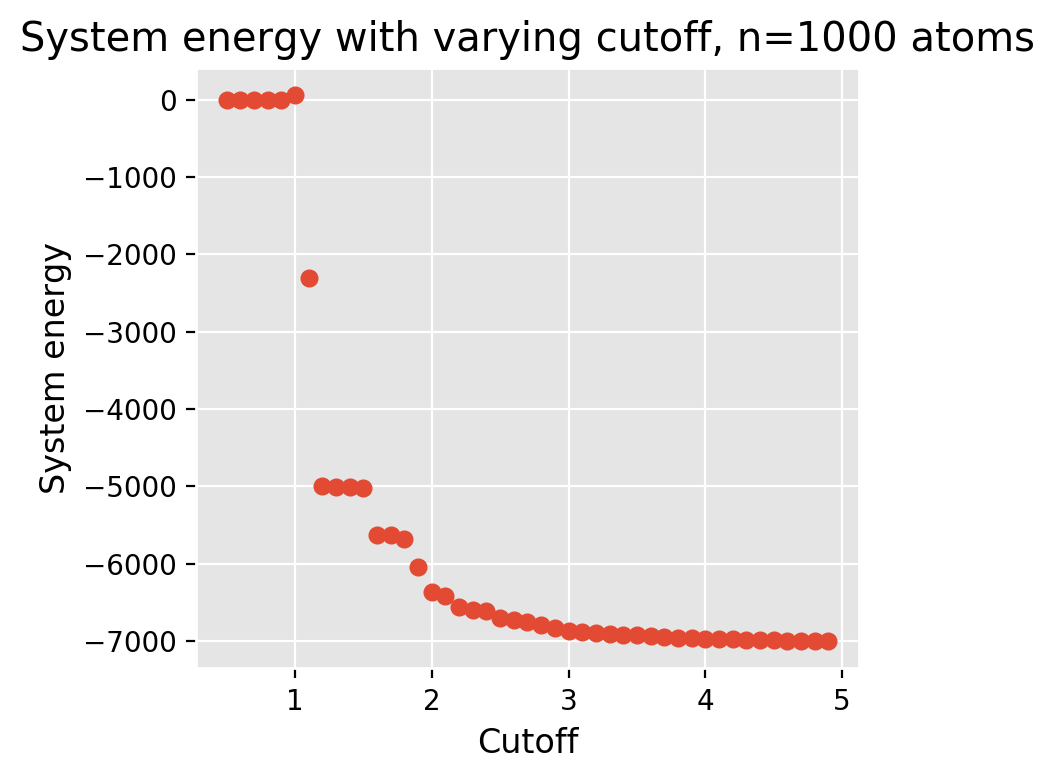

In [143]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

plt.style.use('ggplot')
rcParams['figure.figsize'] = (5,4)
rcParams['figure.dpi'] = 200
rcParams['font.family'] = 'DejaVu Sans'

COLOR = 'black'
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR

plt.scatter(cutoff_results[:,0],cutoff_results[:,1])
plt.title("System energy with varying cutoff, n=1000 atoms")
plt.xlabel("Cutoff")
plt.ylabel("System energy")
plt.tight_layout()
plt.savefig("problem_4b.png")
plt.show()

         11 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.000    0.000 <ipython-input-28-ba78c401ce71>:1(calculate_pairwise_distance)
        3    0.000    0.000    0.000    0.000 <ipython-input-46-09111ef918c8>:64(efficient_lennard_jones)
        1    0.000    0.000    0.000    0.000 <ipython-input-70-85e84215a56b>:1(calculate_system_energy)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         11 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.000    0.000 <ipython-input-28-ba7

/Users/ryanneff/anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


   0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




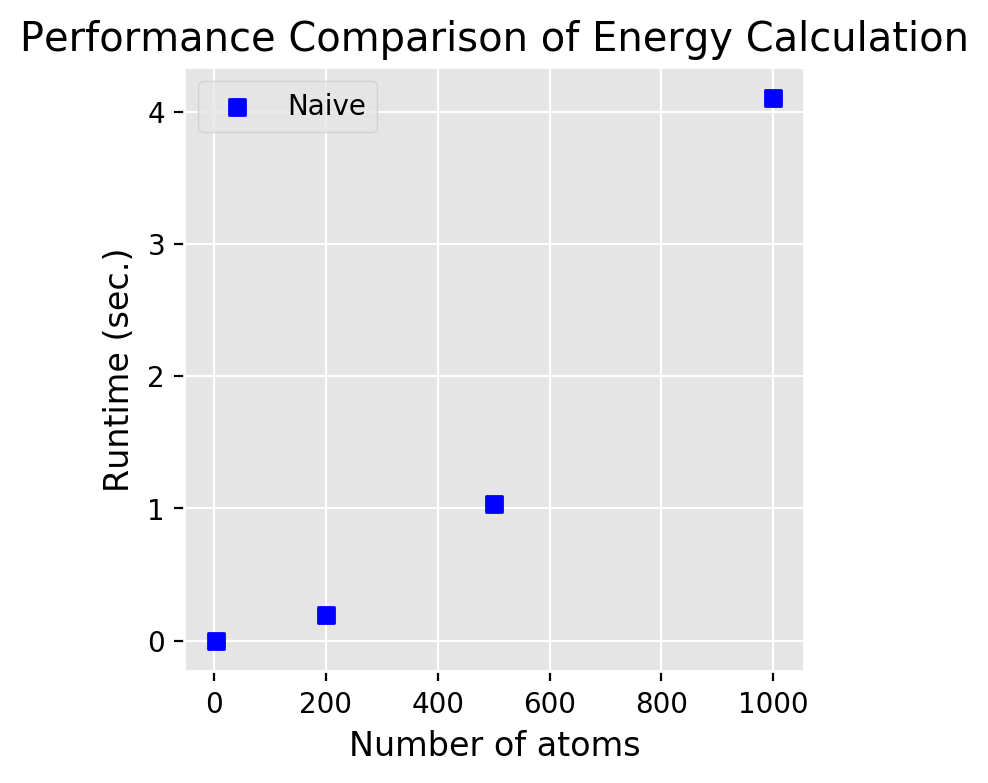

In [124]:
ideal_cutoff = 3.7
cProfile.run('calculate_system_energy(test_3)') #naive
cProfile.run('calculate_system_energy_naive_cutoff(test_3,ideal_cutoff)') #naive cutoff

cProfile.run('calculate_system_energy(test_200)') #naive
cProfile.run('calculate_system_energy_naive_cutoff(test_200,ideal_cutoff)') #naive cutoff

cProfile.run('calculate_system_energy(test_500)') #naive
cProfile.run('calculate_system_energy_naive_cutoff(test_500,ideal_cutoff)') #naive cutoff

cProfile.run('calculate_system_energy(test_1000)') #naive
cProfile.run('calculate_system_energy_naive_cutoff(test_1000,ideal_cutoff)') #naive cutoff

import time

def runtime(function):
    t0 = time.time()  # start time
    exec(function)
    t1 = time.time() # end time
    return(t1-t0)

n3 = runtime('calculate_system_energy(test_3)') #naive
c3 = runtime('calculate_system_energy_naive_cutoff(test_3,ideal_cutoff)') #naive cutoff

n200 = runtime('calculate_system_energy(test_200)') #naive
c200 = runtime('calculate_system_energy_naive_cutoff(test_200,ideal_cutoff)') #naive cutoff

n500 = runtime('calculate_system_energy(test_500)') #naive
c500 = runtime('calculate_system_energy_naive_cutoff(test_500,ideal_cutoff)') #naive cutoff

n1000 = runtime('calculate_system_energy(test_1000)') #naive
c1000 = runtime('calculate_system_energy_naive_cutoff(test_1000,ideal_cutoff)') #naive cutoff




/Users/ryanneff/anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/Users/ryanneff/anaconda3/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/ryanneff/anaconda3/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


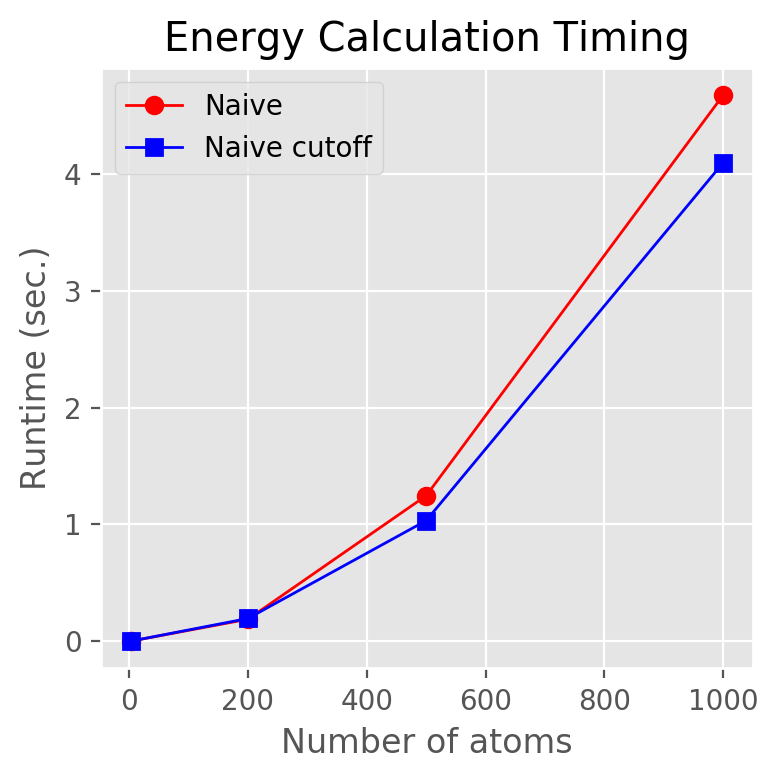

In [141]:
plt.style.use('ggplot')
rcParams['figure.figsize'] = (4,4)
rcParams['figure.dpi'] = 200
rcParams['font.family'] = 'DejaVu Sans'

plt.hold(True)
plt.plot([3,200,500,1000],[n3,n200,n500,n1000],"ro-",linewidth="1")
plt.plot([3,200,500,1000],[c3,c200,c500,c1000],"bs-",linewidth="1")
plt.title("Energy Calculation Timing")
plt.xlabel("Number of atoms")
plt.ylabel("Runtime (sec.)")
plt.legend(["Naive","Naive cutoff"])
plt.tight_layout()
plt.savefig("problem_4c.png")
plt.show()